## App to get literature from multiple years

#### work in progress

example of search term: (stroke[Title/Abstract]) AND ("2017/01/01"[Date - Publication] : "3000"[Date - Publication])

build new search terms here: https://www.ncbi.nlm.nih.gov/pubmed/advanced

In [156]:
import scraper as sc
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [24]:
retmax = 100
email = 'chris.dinant@gmail.com'

In [46]:
def make_query(term, year):
    return '({}[Title/Abstract]) AND \
({}[Date - Publication])'\
.format(term, year)

In [47]:
make_query('parkinson\'s', 2016)

"(parkinson's[Title/Abstract]) AND (2016[Date - Publication])"

In [103]:
# rough, should probably be using a defaultdict here
for i, n in enumerate(range(2000,2019,1)):
    new_keys = range(i*retmax, (i+1)*retmax)
    query = make_query('parkinson\'s', n)
    ap = sc.ArticleParser(retmax, email)
    raw_dict = ap.find_term(query)
    articles = ap.fetch_info(raw_dict['IdList'])
    if i == 0:
        parsed_dict = ap.parse_info(articles)
    else:
        n_parsed_dict = ap.parse_info(articles)
        for k in n_parsed_dict.keys():
            parsed_dict[new_keys[k]] = n_parsed_dict[k] # add articles from the next year behind the current  


There are no citations for article 0

There are no citations for article 1

There are no citations for article 2

There are no citations for article 3

There's no abstract for article 3

There are no citations for article 4

There are no citations for article 6

There's no author info for article 7

There are no citations for article 7

There's no abstract for article 7

There are no citations for article 8

There are no citations for article 9

There are no citations for article 10

There's no abstract for article 10

There are no citations for article 11

There are no citations for article 12

There's no abstract for article 13

There are no citations for article 14

There are no citations for article 15

There are no citations for article 16

There are no citations for article 17

There are no citations for article 18

There are no citations for article 19

There are no citations for article 20

There are no citations for article 21

There's no abstract for article 22

There are no 

In [120]:
df = pd.DataFrame.from_dict(parsed_dict, orient = 'index')
df.date = pd.to_datetime(df.date)
df = df[df.abstract != ''].sort_values(by='date', 
                                       ascending=0)\
                          .reset_index(drop=True)
df.head()

,date,authors,abstract,published in,title,citations
0,2018-07-05,"Robin Fackrell, Camille B Carroll, Donald G Gr...","In the past 4 years, two adjunctive treatment ...",Neurodegenerative disease management,Noninvasive options for 'wearing-off' in Parki...,
1,2018-07-05,"Farah El Turk, Erwin De Genst, Tim Guilliams, ...",Intracellular deposits of α-synuclein in the f...,Protein science : a publication of the Protein...,Exploring the role of post-translational modif...,
2,2018-07-04,"Walter Di Iorio, Alessandro Ciarimboli, Giorgi...","p = 0.0077. In conclusion, AO reveals to be a ...","Diseases (Basel, Switzerland)",Action Observation in People with Parkinson's ...,
3,2018-07-03,"Seung-Ju Yang, Ji Woong Yang, Jung-Min Na, Ji ...",Parkinson's disease (PD) is a common chronic n...,BMB reports,3-(Naphthalen-2-yl(propoxy)methyl)azetidine hy...,
4,2018-07-03,"Avner Thaler, Tal Gonen, Anat Mirelman, Rick C...",Disturbances in reward processing occur in Par...,Brain imaging and behavior,Altered reward-related neural responses in non...,


In [124]:
df.to_csv('parkinson_2000tonow.csv')

In [145]:
# top 20 journals from each year, 1999 to 2017
jr_dict = defaultdict(list)
for year in range(1999,2018):
    scimago = pd.read_csv('scimago/scimagojr {}  \
Subject Category - Neurology (clinical).csv'.format(year), sep=';')
    jr_dict[year] = scimago.Title[:20].tolist()
        

In [149]:
jr_dict[1999]

['Annals of Neurology',
 'Brain Research Reviews',
 'Brain',
 'Critical Reviews in Neurobiology',
 'Journal of Cerebral Blood Flow and Metabolism',
 'Human Brain Mapping',
 'Stroke',
 'Journal of Neuropathology and Experimental Neurology',
 'Neurology',
 'Brain Pathology',
 'Journal of Neurosurgery',
 'International Review of Neurobiology',
 'JAMA Neurology',
 'Neurosurgery',
 'Pain',
 'Neurobiology of Aging',
 'Journal of Neuropsychiatry and Clinical Neurosciences',
 'American Journal of Neuroradiology',
 'Journal of Neuroimmunology',
 'Epilepsia']

In [135]:
gen_top_jr = ['Science', 
            'Nature', 
            'Cell', 
            'Nature Medicine', 
            'New England Journal of Medicine']

In [176]:
fractions = defaultdict(list)

In [177]:
for key, value in jr_dict.items():
    mask = (df.date > str(key))&(df.date < str(key+1))
    fractions[key] = df.loc[mask]\
    ['published in'].apply(lambda x: x in value).sum()\
    + df.loc[mask]\
    ['published in'].apply(lambda x: x in gen_top_jr).sum()

__This should include newer literature, compared with the latest scimago data__

In [178]:
fractions

defaultdict(list,
            {1999: False,
             2000: 0,
             2001: 2,
             2002: 5,
             2003: 1,
             2004: 8,
             2005: 0,
             2006: 0,
             2007: 2,
             2008: 0,
             2009: 0,
             2010: 0,
             2011: 0,
             2012: 0,
             2013: 0,
             2014: 0,
             2015: 0,
             2016: 0,
             2017: 0})

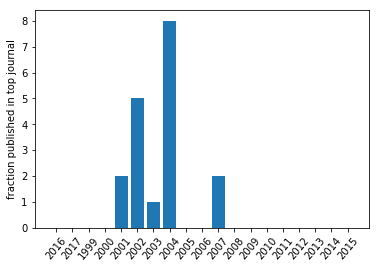

In [179]:
plt.bar(range(len(fractions)), list(fractions.values()), align='center')
plt.xticks(range(len(fractions)), list(fractions.keys()), rotation = 50)
plt.ylabel('fraction published in top journal')
plt.show()

years not sorted yet